In [177]:
from sklearn import preprocessing
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [178]:
fake_data = pd.read_csv('/Users/ryan/Downloads/archive/Fake.csv')
true_data = pd.read_csv('/Users/ryan/Downloads/archive/True.csv')

In [179]:
fake_data.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [180]:
true_data.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [181]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [182]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [183]:
fake_data.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [184]:
true_data.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [185]:
fake_data['label'] = 0
true_data['label'] = 1

In [186]:
all_data = pd.concat([fake_data, true_data], axis=0).reset_index(drop=True)
all_data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [187]:
all_data.drop(columns=['subject', 'date'], inplace=True)

In [188]:
all_data['content'] = all_data['title'] + ' ' + all_data['text']
all_data

,title,text,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,'Fully committed' NATO backs new U.S. approach...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1,LexisNexis withdrew two products from Chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1,Minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1,Vatican upbeat on possibility of Pope Francis ...


In [189]:
all_data['title_len'] = all_data['title'].str.split().str.len()
all_data['text_len'] = all_data['text'].str.split().str.len()
all_data

,title,text,label,content,title_len,text_len
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump Sends Out Embarrassing New Year’...,12,495
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,Drunk Bragging Trump Staffer Started Russian ...,8,305
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,Sheriff David Clarke Becomes An Internet Joke...,15,580
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,Trump Is So Obsessed He Even Has Obama’s Name...,14,444
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,Pope Francis Just Called Out Donald Trump Dur...,11,420
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,'Fully committed' NATO backs new U.S. approach...,9,466
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1,LexisNexis withdrew two products from Chinese ...,7,125
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1,Minsk cultural hub becomes haven from authorit...,7,320
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1,Vatican upbeat on possibility of Pope Francis ...,9,205


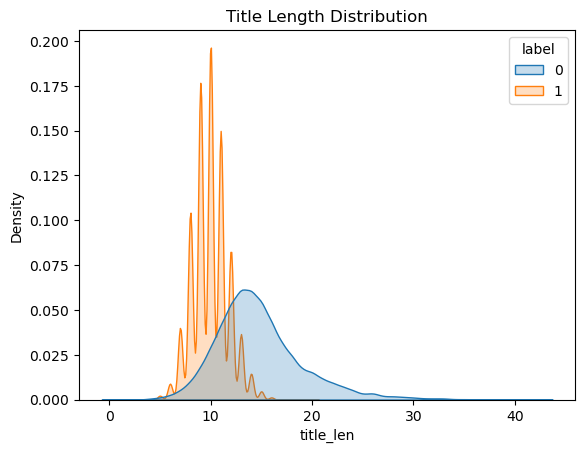

In [190]:
sns.kdeplot(data=all_data, x='title_len', hue='label', fill=True)
plt.title('Title Length Distribution')
plt.show()

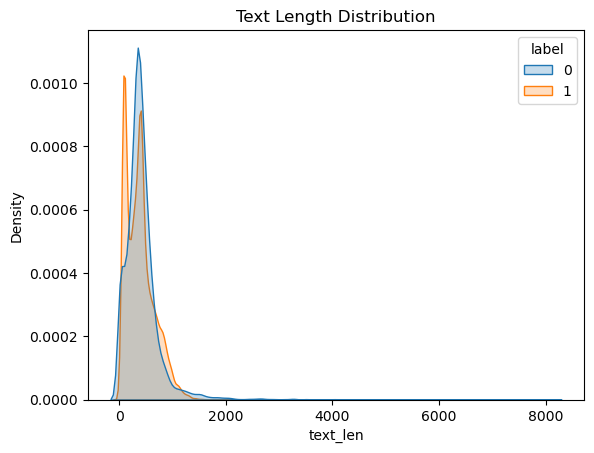

In [191]:
sns.kdeplot(data=all_data, x='text_len', hue='label', fill=True)
plt.title('Text Length Distribution')
plt.show()

In [192]:
def tokenize(text):
    if pd.isna(text):
        return []
    text = str(text).lower()
    # 移除標點符號與非英數空白字元
    text = re.sub(r'[^a-z0-9\\s]', ' ', text)
    return text.split()

# 若 content 尚未 tokenized，先 tokenized；否則仍可安全處理
all_data['content'] = all_data['content'].apply(lambda t: tokenize(t) if not isinstance(t, (list, tuple)) else t)

# 把 tokens join 回字串，讓後續的 TfidfVectorizer 可以直接處理
all_data['content'] = all_data['content'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, (list, tuple)) else str(tokens))

# 確認前幾筆並顯示型態
print(all_data['content'].head())
print('\nSample type:', type(all_data['content'].iloc[0]))

0    donald trump sends out embarrassing new year s...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes an internet joke ...
3    trump is so obsessed he even has obama s name ...
4    pope francis just called out donald trump duri...
Name: content, dtype: object

Sample type: <class 'str'>


In [193]:
def get_top_words(texts, n=20):
    words = []
    for t in texts:
        words += tokenize(t)
    # 過濾 stopwords
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return Counter(words).most_common(n)

In [194]:
fake_text = fake_data['text']
true_text = true_data['text']

fake_top = get_top_words(fake_text, n=20)
true_top = get_top_words(true_text, n=20)

In [195]:
fake_df = pd.DataFrame(fake_top, columns=['word', 'fake_count'])
true_df = pd.DataFrame(true_top, columns=['word', 'true_count'])

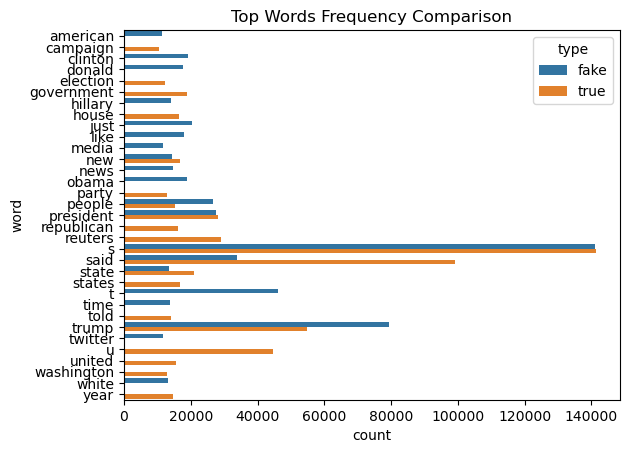

In [196]:
plot_df = pd.merge(fake_df, true_df, on='word', how='outer').fillna(0)

plot_df = plot_df.melt(id_vars=['word'], var_name='type', value_name='count')
plot_df['type'] = plot_df['type'].str.replace('_count', '')

sns.barplot(data=plot_df, x='count', y='word', hue='type')
plt.title('Top Words Frequency Comparison')
plt.show()

In [197]:
X = all_data['content']   
y = all_data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [198]:
fake_train = X_train[y_train == 0]
true_train = X_train[y_train == 1]

fake_top = dict(get_top_words(fake_train, 200))
true_top = dict(get_top_words(true_train, 200))

diff = {}
for word in set(list(fake_top.keys()) + list(true_top.keys())):
    diff[word] = fake_top.get(word, 0) - true_top.get(word, 0)

top_diff_words = sorted(diff.items(), key=lambda x: abs(x[1]), reverse=True)[:20]
top_diff_words = [w for w, _ in top_diff_words]

print(top_diff_words)

['said', 't', 'u', 'reuters', 'trump', 'just', 'video', 'hillary', 'like', 'twitter', 'america', 'people', 'obama', 'don', 'north', 'know', 'image', 'government', 'china', 'clinton']


In [199]:
vectorizer = CountVectorizer(vocabulary=top_diff_words)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

In [200]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9933184855233853
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4696
           1       0.99      1.00      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4655   41]
 [  19 4265]]
